<a href="https://colab.research.google.com/github/mukta121/Basket/blob/master/women_Disease_AutoEncoder_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective:
To train a deep neural network model to generate synthetic data. Here we will use Autoencoder architecture to achieve our objective.


## Load all the important libraries for running the model

In [0]:
###############################################################################
# Load all the necessary libraries
###############################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Now let's load the diseaseriosis raw data file in notebook enviornment

In [0]:
###############################################################################
# Load Data for both test and control
###############################################################################
path = "/tf/notebooks/disease_data/"
df_disease = pd.read_csv(path + 'disease_New_Pats_Dat_4_19.csv', low_memory = False)
# converting Patient ID with other numbers
df_disease = df_disease.rename(columns = {'PRSN_REAL_GID': 'P_ID'})
df_disease.loc[:,'P_ID'] = [x for x in range(1, df_disease.shape[0] + 1)]

In [0]:
df_disease.head()

,P_ID,PRSN_EST_INCOME,PRSN_ETHNIC_CDE,PTNT_GNDR_CDE,PRSN_CNSUS_EDCTN_LVL_CDE,PRSN_LFSTG_GRP_CDE,PRSN_MAILABLE_IND,PRSN_NET_WRTH_IND,PRSN_PRIZM_LVL_CDE,PRSN_PRIZM_SIX_CDE,...,PTNT_PRSN_NBR,PRSN_BRTH_YR,PRSN_ZIP_SEC,PRSN_ST_ABBR,NEW_PATIENT_IND,NEW_DIAG_IND,ADV_HH_EDUCATION,ADV_TARGET_INCOME_2,RECORD_QUALITY_CDE,ETHNIC_GROUP_CODES
0,1,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1952.0,NaN,NaN,0,1,4.0,4,1.0,1
1,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1964.0,NaN,NaN,0,1,3.0,3,1.0,1
2,3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1964.0,NaN,NaN,0,0,2.0,7,1.0,15
3,4,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1988.0,NaN,NaN,0,1,4.0,7,1.0,15
4,5,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1955.0,996.0,AK,0,1,3.0,C,1.0,66


#### Descriptive Statistics before missing value treatment

In [0]:
df_disease[['PTNT_PRSN_NBR','PRSN_BRTH_YR','PRSN_ZIP_SEC','NEW_PATIENT_IND','NEW_DIAG_IND','ADV_HH_EDUCATION']].describe()

,PTNT_PRSN_NBR,PRSN_BRTH_YR,PRSN_ZIP_SEC,NEW_PATIENT_IND,NEW_DIAG_IND,ADV_HH_EDUCATION
count,89798.000000,97721.000000,97067.000000,97724.000000,97724.000000,52524.000000
mean,0.724626,1978.582290,471.394841,0.016127,0.600436,2.980066
std,4.027123,11.152274,281.575432,0.125965,0.489811,0.911775
min,0.000000,1925.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1972.000000,232.000000,0.000000,0.000000,2.000000
50%,0.000000,1979.000000,441.000000,0.000000,1.000000,3.000000
75%,1.000000,1986.000000,740.000000,0.000000,1.000000,4.000000
max,711.000000,2018.000000,999.000000,1.000000,1.000000,5.000000


### Function to check the percentage of missing values in *df_disease*
* Function to check the % of **NaN's** in a dataframe

In [0]:
def check_nan(data):
    print(round(data.isnull().sum()/len(data)*100, 2),'%')

check_nan(df_disease)
df_disease.dtypes

P_ID                         0.00
PRSN_EST_INCOME             49.60
PRSN_ETHNIC_CDE             49.60
PTNT_GNDR_CDE                0.00
PRSN_CNSUS_EDCTN_LVL_CDE    49.60
PRSN_LFSTG_GRP_CDE          49.60
PRSN_MAILABLE_IND           49.60
PRSN_NET_WRTH_IND           49.60
PRSN_PRIZM_LVL_CDE          49.60
PRSN_PRIZM_SIX_CDE          49.60
PRSN_RACE_CDE               49.60
PRSN_SOC_GRP_CDE            49.60
PTNT_PRSN_NBR                8.11
PRSN_BRTH_YR                 0.00
PRSN_ZIP_SEC                 0.67
PRSN_ST_ABBR                 0.78
NEW_PATIENT_IND              0.00
NEW_DIAG_IND                 0.00
ADV_HH_EDUCATION            46.25
ADV_TARGET_INCOME_2         46.23
RECORD_QUALITY_CDE          53.44
ETHNIC_GROUP_CODES          46.23
dtype: float64 %


P_ID                          int64
PRSN_EST_INCOME              object
PRSN_ETHNIC_CDE              object
PTNT_GNDR_CDE                 int64
PRSN_CNSUS_EDCTN_LVL_CDE    float64
PRSN_LFSTG_GRP_CDE           object
PRSN_MAILABLE_IND            object
PRSN_NET_WRTH_IND            object
PRSN_PRIZM_LVL_CDE           object
PRSN_PRIZM_SIX_CDE          float64
PRSN_RACE_CDE                object
PRSN_SOC_GRP_CDE             object
PTNT_PRSN_NBR               float64
PRSN_BRTH_YR                float64
PRSN_ZIP_SEC                float64
PRSN_ST_ABBR                 object
NEW_PATIENT_IND               int64
NEW_DIAG_IND                  int64
ADV_HH_EDUCATION            float64
ADV_TARGET_INCOME_2          object
RECORD_QUALITY_CDE          float64
ETHNIC_GROUP_CODES           object
dtype: object

In [0]:
pd.crosstab(df_disease.ADV_HH_EDUCATION, df_disease.ADV_TARGET_INCOME_2)

ADV_TARGET_INCOME_2,1,2,3,4,5,6,7,8,9,A,B,C,D
ADV_HH_EDUCATION,,,,,,,,,,,,,
1.0,361,148,293,198,173,225,114,48,22,12,2,0,0
2.0,2139,1227,2089,1943,1793,3119,1719,825,393,286,116,62,19
3.0,1027,786,1807,1816,2088,3920,2930,1620,1425,891,470,336,55
4.0,98,125,594,666,1202,2353,2271,1298,1751,1058,972,1156,635
5.0,14,5,59,61,137,340,313,178,267,105,118,148,103


### Observation:
As we see that many about 50% of the data are missing.


In [0]:
check_nan(df_disease)

P_ID                         0.00
PRSN_EST_INCOME             49.60
PRSN_ETHNIC_CDE             49.60
PTNT_GNDR_CDE                0.00
PRSN_CNSUS_EDCTN_LVL_CDE    49.60
PRSN_LFSTG_GRP_CDE          49.60
PRSN_MAILABLE_IND           49.60
PRSN_NET_WRTH_IND           49.60
PRSN_PRIZM_LVL_CDE          49.60
PRSN_PRIZM_SIX_CDE          49.60
PRSN_RACE_CDE               49.60
PRSN_SOC_GRP_CDE            49.60
PTNT_PRSN_NBR                8.11
PRSN_BRTH_YR                 0.00
PRSN_ZIP_SEC                 0.67
PRSN_ST_ABBR                 0.78
NEW_PATIENT_IND              0.00
NEW_DIAG_IND                 0.00
ADV_HH_EDUCATION            46.25
ADV_TARGET_INCOME_2         46.23
RECORD_QUALITY_CDE          53.44
ETHNIC_GROUP_CODES          46.23
dtype: float64 %


### Now let's preparing data for modeling. We will perform following steps
* Feature Engineering
* Treating missing/NaN's
* Repalcing special characters present as value in some of the features
* Most of Object type variables have 50% missing values, we will replace -1 as defalut

In [0]:
# Age Calculation
df_disease.loc[:, 'AGE'] = 2018 - df_disease.PRSN_BRTH_YR.values

# Replacing all NaN's with -1
df_disease = df_disease.fillna(-1)


In [0]:
# Check % of missing values
#ds_disease.loc[:, 'PRSN_ZIP_SEC']
#check_nan(df_disease)
df_disease.dtypes

P_ID                          int64
PRSN_EST_INCOME              object
PRSN_ETHNIC_CDE              object
PTNT_GNDR_CDE                 int64
PRSN_CNSUS_EDCTN_LVL_CDE    float64
PRSN_LFSTG_GRP_CDE           object
PRSN_MAILABLE_IND            object
PRSN_NET_WRTH_IND            object
PRSN_PRIZM_LVL_CDE           object
PRSN_PRIZM_SIX_CDE          float64
PRSN_RACE_CDE                object
PRSN_SOC_GRP_CDE             object
PTNT_PRSN_NBR               float64
PRSN_BRTH_YR                float64
PRSN_ZIP_SEC                float64
PRSN_ST_ABBR                 object
NEW_PATIENT_IND               int64
NEW_DIAG_IND                  int64
ADV_HH_EDUCATION            float64
ADV_TARGET_INCOME_2          object
RECORD_QUALITY_CDE          float64
ETHNIC_GROUP_CODES           object
AGE                         float64
dtype: object

* We can see that there few variables as float data types. Let's convert them to int type.

In [0]:
# converting Float to int64 and then to string type as all of them are categorical variables
df_disease.loc[:,'PRSN_CNSUS_EDCTN_LVL_CDE'] = df_disease['PRSN_CNSUS_EDCTN_LVL_CDE'].astype(np.int64).astype(str)
df_disease.loc[:,'PRSN_PRIZM_SIX_CDE'] = df_disease['PRSN_PRIZM_SIX_CDE'].astype(np.int64).astype(str)
df_disease.loc[:,'PTNT_PRSN_NBR'] = df_disease['PTNT_PRSN_NBR'].astype(np.int64).astype(str)
df_disease.loc[:,'ADV_HH_EDUCATION'] = df_disease['ADV_HH_EDUCATION'].astype(np.int64).astype(str)
df_disease.loc[:,'RECORD_QUALITY_CDE'] = df_disease['RECORD_QUALITY_CDE'].astype(np.int64).astype(str)

df_disease.loc[:,'PRSN_ZIP_SEC'] = df_disease['PRSN_ZIP_SEC'].astype(np.int64)
df_disease.loc[:,'AGE'] = df_disease['AGE'].astype(np.int64)

#### Descriptive Stats after missing value treatment

In [0]:
#df_disease[['PTNT_PRSN_NBR','PRSN_BRTH_YR','PRSN_ZIP_SEC','NEW_PATIENT_IND','NEW_DIAG_IND','ADV_HH_EDUCATION','AGE']].describe()
df_disease.describe()

,P_ID,PTNT_GNDR_CDE,PRSN_BRTH_YR,PRSN_ZIP_SEC,NEW_PATIENT_IND,NEW_DIAG_IND,AGE
count,97724.00000,97724.000000,97724.000000,97724.000000,97724.000000,97724.000000,97724.000000
mean,48862.50000,1.998567,1978.521520,468.218923,0.016127,0.600436,39.416469
std,28210.63319,0.039152,15.641846,283.270016,0.125965,0.489811,11.154351
min,1.00000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000
25%,24431.75000,2.000000,1972.000000,224.000000,0.000000,0.000000,32.000000
50%,48862.50000,2.000000,1979.000000,440.000000,0.000000,1.000000,39.000000
75%,73293.25000,2.000000,1986.000000,740.000000,0.000000,1.000000,46.000000
max,97724.00000,2.000000,2018.000000,999.000000,1.000000,1.000000,93.000000


### List of the columns that we will keep for the further analysis.

In [0]:
df_disease.columns

Index(['P_ID', 'PRSN_EST_INCOME', 'PRSN_ETHNIC_CDE', 'PTNT_GNDR_CDE',
       'PRSN_CNSUS_EDCTN_LVL_CDE', 'PRSN_LFSTG_GRP_CDE', 'PRSN_MAILABLE_IND',
       'PRSN_NET_WRTH_IND', 'PRSN_PRIZM_LVL_CDE', 'PRSN_PRIZM_SIX_CDE',
       'PRSN_RACE_CDE', 'PRSN_SOC_GRP_CDE', 'PTNT_PRSN_NBR', 'PRSN_BRTH_YR',
       'PRSN_ZIP_SEC', 'PRSN_ST_ABBR', 'NEW_PATIENT_IND', 'NEW_DIAG_IND',
       'ADV_HH_EDUCATION', 'ADV_TARGET_INCOME_2', 'RECORD_QUALITY_CDE',
       'ETHNIC_GROUP_CODES', 'AGE'],
      dtype='object')

In [0]:
cols_list = ['P_ID', 'PTNT_GNDR_CDE', 'PRSN_LFSTG_GRP_CDE', 'PRSN_NET_WRTH_IND', 'PRSN_PRIZM_LVL_CDE', 'PRSN_PRIZM_SIX_CDE',
       'PRSN_RACE_CDE', 'PRSN_SOC_GRP_CDE', 'PTNT_PRSN_NBR', 'PRSN_BRTH_YR', 'PRSN_ZIP_SEC', 'NEW_PATIENT_IND', 
       'NEW_DIAG_IND', 'ADV_HH_EDUCATION', 'ADV_TARGET_INCOME_2', 'RECORD_QUALITY_CDE', 'ETHNIC_GROUP_CODES']

print('Final columns length for training the model: ', len(cols_list))

df_disease1 = df_disease[cols_list]

Final columns length for training the model:  17


In [0]:
df_disease1.columns
df_disease1.head()

,P_ID,PTNT_GNDR_CDE,PRSN_LFSTG_GRP_CDE,PRSN_NET_WRTH_IND,PRSN_PRIZM_LVL_CDE,PRSN_PRIZM_SIX_CDE,PRSN_RACE_CDE,PRSN_SOC_GRP_CDE,PTNT_PRSN_NBR,PRSN_BRTH_YR,PRSN_ZIP_SEC,NEW_PATIENT_IND,NEW_DIAG_IND,ADV_HH_EDUCATION,ADV_TARGET_INCOME_2,RECORD_QUALITY_CDE,ETHNIC_GROUP_CODES
0,1,2,-1,-1,-1,-1,-1,-1,-1,1952.0,-1,0,1,4,4,1,1
1,2,2,-1,-1,-1,-1,-1,-1,-1,1964.0,-1,0,1,3,3,1,1
2,3,2,-1,-1,-1,-1,-1,-1,-1,1964.0,-1,0,0,2,7,1,15
3,4,2,-1,-1,-1,-1,-1,-1,-1,1988.0,-1,0,1,4,7,1,15
4,5,2,-1,-1,-1,-1,-1,-1,0,1955.0,996,0,1,3,C,1,66


### Now we will select Categorical type variables and factorize them
* Let's write a function which will filter 'Object' type and convert into numeric labels

In [0]:
def category_fact(df_disease1, id_col = None):
    char_cols = df_disease1.dtypes.pipe(lambda x: x[x == 'object']).index
    rem_cols = list(np.setdiff1d(list(df_disease1.columns), char_cols))
    new_cols = list(map((lambda x: str(x) + '_fact'), char_cols))
    final_cols = rem_cols + new_cols
    
    # converting Object to Factor
    for col in char_cols:
        new_col = str(col) + '_fact'
        #df_disease1.loc[:, col] = df_disease1[col].astype("category")
        df_disease1.loc[:, new_col] = pd.factorize(df_disease1[col])[0]
    return df_disease1, df_disease1[final_cols]

In [0]:
##  Selecting Factorized columns for further analysis 
df_disease1, df_disease1_2 = category_fact(df_disease1)
print('df_disease1-shape:', df_disease1.shape)
print('df_disease1_2-shape:', df_disease1_2.shape)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


df_endo-shape: (97724, 28)
df_endo_2-shape: (97724, 17)


In [0]:
df_disease1.head();
df_disease1_2.head()

,NEW_DIAG_IND,NEW_PATIENT_IND,PRSN_BRTH_YR,PRSN_ZIP_SEC,PTNT_GNDR_CDE,P_ID,PRSN_LFSTG_GRP_CDE_fact,PRSN_NET_WRTH_IND_fact,PRSN_PRIZM_LVL_CDE_fact,PRSN_PRIZM_SIX_CDE_fact,PRSN_RACE_CDE_fact,PRSN_SOC_GRP_CDE_fact,PTNT_PRSN_NBR_fact,ADV_HH_EDUCATION_fact,ADV_TARGET_INCOME_2_fact,RECORD_QUALITY_CDE_fact,ETHNIC_GROUP_CODES_fact
0,1,0,1952.0,-1,2,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1964.0,-1,2,2,0,0,0,0,0,0,0,1,1,0,0
2,0,0,1964.0,-1,2,3,0,0,0,0,0,0,0,2,2,0,1
3,1,0,1988.0,-1,2,4,0,0,0,0,0,0,0,0,2,0,1
4,1,0,1955.0,996,2,5,0,0,0,0,0,0,1,1,3,0,2


In [0]:
###############################################################################
# Data spliting and preparation for modeling
###############################################################################

# Splitting dataframe into train and test set
from sklearn.model_selection import train_test_split

# Split into 80/20
disease1_train, disease1_test = train_test_split(df_disease1_2, test_size = .25)

# Resetting Index of both train and test set
disease1_train = disease1_train.reset_index(drop = True)
disease1_train_pats = disease1_train.P_ID.values
disease1_train = disease1_train.drop(columns = ['P_ID'], axis = 1)

disease1_test = disease1_test.reset_index(drop = True)
disease1_test_pats = disease1_test.P_ID.values
disease1_test = disease1_test.drop(columns = ['P_ID'], axis = 1)

### We will use Min-Max feature scaling to bring values between  0 and 1

In [0]:
# Scalling the input Test and Train using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler, normalize, Normalizer

# Scaling Train set
scaler_train = MinMaxScaler()
scaler_train = scaler_train.fit(disease1_train)
disease1_train_scaled = scaler_train.transform(disease1_train)

# Feature normalization using L2 norm
#scaler_train = Normalizer(norm = 'l2')
#scaler_train = scaler_train.fit(disease1_train)  # fit does nothing
#disease1_train_scaled = scaler_train.transform(disease1_train)

# Scaling Test Set
scaler_test = MinMaxScaler()
scaler_test = scaler_test.fit(disease1_test)
disease1_test_scaled = scaler_test.transform(disease1_test)

# Feature normalization using L2 norm
#scaler_test = Normalizer(norm = 'l2')
#scaler_test = scaler_test.fit(disease1_test)  # fit does nothing
#disease1_test_scaled = scaler_test.transform(disease1_test)


In [0]:
disease1_test_scaled[:5,:]

array([[1.        , 0.        , 0.97659363, 0.28328328, 1.        ,
        0.45454545, 1.        , 0.1       , 0.44117647, 0.77777778,
        0.5       , 0.03296703, 0.        , 0.38461538, 0.        ,
        0.08888889],
       [1.        , 0.        , 0.98904382, 0.6016016 , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.33333333,
        1.        ],
       [1.        , 0.        , 0.98306773, 0.11411411, 1.        ,
        0.81818182, 1.        , 0.1       , 0.82352941, 0.44444444,
        0.78571429, 0.01098901, 0.4       , 0.38461538, 0.        ,
        0.14444444],
       [1.        , 0.        , 0.9810757 , 0.85385385, 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01098901, 0.        , 0.46153846, 0.        ,
        0.        ],
       [1.        , 0.        , 0.98854582, 0.62962963, 1.        ,
        0.        , 0.        , 

In [0]:
# Check
print(disease1_train_scaled.shape)
print(disease1_test_scaled.shape)

(73293, 16)
(24431, 16)


Now our data is ready for model building. We will ***Deep AutoEncoder*** to train our model. First we will download all the necessary libraries and follow the below steps:

* Define input shape of input data
* Define encoding and decoding layers
* Model definition
* Optimization, loss function and metrics to check the performance

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from random import randint
from keras.layers import Input, Dense, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential, save_model
from keras.optimizers import Adadelta, RMSprop, SGD, Adam
from keras import regularizers
from keras import backend as bk

Using TensorFlow backend.


In [0]:
# Input Dimension of Input Node
ncol = disease1_train_scaled.shape[1]
input_dim = Input(shape = (ncol, ))
print(input_dim)

Tensor("input_1:0", shape=(?, 16), dtype=float32)


In [0]:
## Encoding Layer Setup
# Encoder Layers
#def encoding_layer(n_col = None, activation = None, batch_norm = None, dropout = None, dim_reduct = None):

encoded1 = Dense(14, activation = 'relu')(input_dim)
encoded1 = BatchNormalization()(encoded1)
#encoded1 = layers.Dropout(0.5)(encoded1)
encoded2 = Dense(12, activation = 'relu')(encoded1)
encoded2 = BatchNormalization()(encoded2)
encoded3 = Dense(10, activation = 'relu')(encoded2)
encoded3 = BatchNormalization()(encoded3)
encoded4 = Dense(8, activation = 'relu')(encoded3)
encoded4 = BatchNormalization()(encoded4)

## Decoding Layer
# Decoder Layers
decoded1 = Dense(8, activation = 'relu')(encoded4)
decoded1 = BatchNormalization()(decoded1)
decoded2 = Dense(10, activation = 'relu')(decoded1)
decoded2 = BatchNormalization()(decoded2)
decoded3 = Dense(12, activation = 'relu')(decoded2)
decoded3 = BatchNormalization()(decoded3)
decoded4 = Dense(14, activation = 'relu')(decoded3)
decoded4 = BatchNormalization()(decoded4)
decoded5 = Dense(ncol, activation = 'linear')(decoded4)


* Optimization function setup and loss function selection here we have defined our own loss function to validate our trained Model.

In [0]:
# Combine Encoder and Deocder layers
model = Model(inputs = input_dim, outputs = decoded5)

# Custom Function to check the Accuracy of trained model
from keras import backend as bk
def soft_acc(y_true, y_pred):
    return bk.mean(bk.equal(bk.round(y_true), bk.round(y_pred)), axis = 0)

# Model Summary and number of weights/parameters in each layer
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                238       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14)                56        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                180       
_________________________________________________________________
batch_normalization_2 (Batch (None, 12)                48        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                130       
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)                40        
__________

In [0]:
# Now Putting all the aobve setup and parameters together
model.compile(optimizer = 'adam', loss = 'mse', metrics = [soft_acc])
history = model.fit(x = disease1_train_scaled, y = disease1_train_scaled, batch_size = 128, epochs = 25 , shuffle = True, verbose = 1, validation_data = (disease1_test_scaled, disease1_test_scaled))

Train on 73293 samples, validate on 24431 samples
Epoch 1/25
73293/73293 [==============================] - 7s 91us/step - loss: 0.1434 - soft_acc: 0.8068 - val_loss: 0.0320 - val_soft_acc: 0.9117
Epoch 2/25
73293/73293 [==============================] - 5s 62us/step - loss: 0.0255 - soft_acc: 0.9234 - val_loss: 0.0175 - val_soft_acc: 0.9376
Epoch 3/25
73293/73293 [==============================] - 5s 62us/step - loss: 0.0177 - soft_acc: 0.9387 - val_loss: 0.0140 - val_soft_acc: 0.9460
Epoch 4/25
73293/73293 [==============================] - 5s 62us/step - loss: 0.0156 - soft_acc: 0.9437 - val_loss: 0.0127 - val_soft_acc: 0.9509
Epoch 5/25
73293/73293 [==============================] - 5s 62us/step - loss: 0.0143 - soft_acc: 0.9475 - val_loss: 0.0116 - val_soft_acc: 0.9527
Epoch 6/25
73293/73293 [==============================] - 5s 62us/step - loss: 0.0131 - soft_acc: 0.9509 - val_loss: 0.0105 - val_soft_acc: 0.9566
Epoch 7/25
73293/73293 [==============================] - 5s 62us/st

In [0]:
# List of Objects in Model History
print(history.history.keys())

dict_keys(['val_loss', 'soft_acc', 'val_soft_acc', 'loss'])


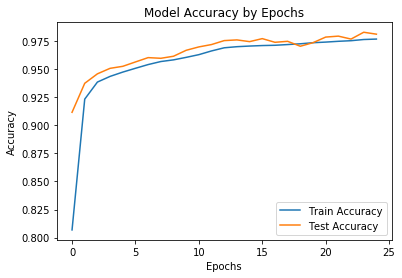

In [0]:
## Visualization of Model Accuracy and Loss
# summarize history for accuracy
plt.plot(history.history['soft_acc'])
plt.plot(history.history['val_soft_acc'])
plt.title('Model Accuracy by Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()


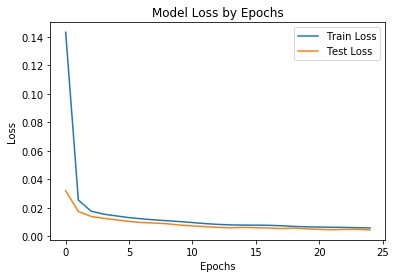

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss by Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.show()

In [0]:
###############################################################################
# Model Evaluation on both train and test set
# Train/Test - Cross Entropy Cost function
###############################################################################
# Train Set - Evaluation
train_eval = model.evaluate(disease1_train_scaled, disease1_train_scaled, verbose=0)
print('\n')
print('Train accuracy:', round(train_eval[1], 4) * 100, '%')
print('Train loss:', round(train_eval[0], 4))
print('\n')
# Test Set - Evalution
test_eval = model.evaluate(disease1_test_scaled, disease1_test_scaled, verbose=0)
print('Test accuracy:', round(test_eval[1], 4) * 100,'%')
print('Test loss:', round(test_eval[0], 4))



Train accuracy: 98.22999999999999 %
Train loss: 0.0046


Test accuracy: 98.14 %
Test loss: 0.0045


### Saving the Trained Model in local drive
#### Recreate the exact same model, including weights and optimizer.

In [0]:
###############################################################################
# Saving the Trained Model in local drive
# Recreate the exact same model, including weights and optimizer.
###############################################################################
# Saving the Trained Model in local drive

model.save(path + 'diseaserosis_cross_entropy_v3.h5')

del model;

# Recreate the exact same model, including weights and optimizer.
from keras.models import load_model
model = load_model(path + 'diseaserosis_cross_entropy_v3.h5', custom_objects = {'soft_acc': soft_acc})
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[soft_acc])
#model.summary()

### Prediction on train and test using trained autoencoder model
> Once prediction is done, we will create label mapping dataframes for each categorical variables. Then we will merge the corresponding label mapping tables with the predicted values.
> We will the same mapping for both train and test set.

#### Train Set Prediction

In [0]:
###############################################################################
# Calling Trained model for prediction
###############################################################################
# Prediction on Train and Test and applying Inverse Transform of Scaling
decoded_train = model.predict(disease1_train_scaled)
decoded_train = pd.DataFrame(scaler_train.inverse_transform(decoded_train))
decoded_train = round(abs(decoded_train), 0).astype(np.int64)
decoded_train.columns = disease1_train.columns
decoded_train.loc[:,'P_ID'] = disease1_train_pats

In [0]:
print(df_disease1.shape)
df_disease1.columns

(97724, 28)


Index(['P_ID', 'PTNT_GNDR_CDE', 'PRSN_LFSTG_GRP_CDE', 'PRSN_NET_WRTH_IND',
       'PRSN_PRIZM_LVL_CDE', 'PRSN_PRIZM_SIX_CDE', 'PRSN_RACE_CDE',
       'PRSN_SOC_GRP_CDE', 'PTNT_PRSN_NBR', 'PRSN_BRTH_YR', 'PRSN_ZIP_SEC',
       'NEW_PATIENT_IND', 'NEW_DIAG_IND', 'ADV_HH_EDUCATION',
       'ADV_TARGET_INCOME_2', 'RECORD_QUALITY_CDE', 'ETHNIC_GROUP_CODES',
       'PRSN_LFSTG_GRP_CDE_fact', 'PRSN_NET_WRTH_IND_fact',
       'PRSN_PRIZM_LVL_CDE_fact', 'PRSN_PRIZM_SIX_CDE_fact',
       'PRSN_RACE_CDE_fact', 'PRSN_SOC_GRP_CDE_fact', 'PTNT_PRSN_NBR_fact',
       'ADV_HH_EDUCATION_fact', 'ADV_TARGET_INCOME_2_fact',
       'RECORD_QUALITY_CDE_fact', 'ETHNIC_GROUP_CODES_fact'],
      dtype='object')

#### Creating label and value table for each categorical variables

In [0]:
###############################################################################
# Re-mapping the predicted values to it's original label
# Label Dataframes for each categorical variables
###############################################################################

df_race_label = df_disease1[['PRSN_RACE_CDE','PRSN_RACE_CDE_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
#df_income_label = df_disease1[['PRSN_EST_INCOME','PRSN_EST_INCOME_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
df_income_label = df_disease1[['ADV_TARGET_INCOME_2','ADV_TARGET_INCOME_2_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
df_ethnic_label = df_disease1[['ETHNIC_GROUP_CODES','ETHNIC_GROUP_CODES_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
#df_ethnic_label = df_disease1[['PRSN_ETHNIC_CDE','PRSN_ETHNIC_CDE_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
df_lifestg_label = df_disease1[['PRSN_LFSTG_GRP_CDE','PRSN_LFSTG_GRP_CDE_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
df_soc_label = df_disease1[['PRSN_SOC_GRP_CDE','PRSN_SOC_GRP_CDE_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
#df_state_label = df_disease1[['PRSN_ST_ABBR','PRSN_ST_ABBR_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
#df_mail_label = df_disease1[['PRSN_MAILABLE_IND','PRSN_MAILABLE_IND_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
df_mail_label = df_disease1[['RECORD_QUALITY_CDE','RECORD_QUALITY_CDE_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
df_net_label = df_disease1[['PRSN_NET_WRTH_IND','PRSN_NET_WRTH_IND_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
df_prizm_label = df_disease1[['PRSN_PRIZM_LVL_CDE','PRSN_PRIZM_LVL_CDE_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)

df_prizm_six_label = df_disease1[['PRSN_PRIZM_SIX_CDE','PRSN_PRIZM_SIX_CDE_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
df_prsn_numb_label = df_disease1[['PTNT_PRSN_NBR','PTNT_PRSN_NBR_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
df_education_label = df_disease1[['ADV_HH_EDUCATION','ADV_HH_EDUCATION_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)
#df_zip_label = df_disease1[['PRSN_ZIP_SEC','PRSN_ZIP_SEC_fact']].drop_duplicates(keep = 'first').reset_index(drop = True)

df_zip_state = df_disease[['PRSN_ZIP_SEC','PRSN_ST_ABBR']].drop_duplicates(keep = 'first').reset_index(drop = True)


#### Merging the predicted values with label/value tables

In [0]:
# Merging with Predicted Values and Re-mapping it to Original Labels
decoded_train = pd.merge(left = decoded_train, right = df_race_label, on = 'PRSN_RACE_CDE_fact', how = 'left')
#decoded_train = pd.merge(left = decoded_train, right = df_income_label, on = 'PRSN_EST_INCOME_fact', how = 'left')
decoded_train = pd.merge(left = decoded_train, right = df_income_label, on = 'ADV_TARGET_INCOME_2_fact', how = 'left')
#decoded_train = pd.merge(left = decoded_train, right = df_ethnic_label, on = 'PRSN_ETHNIC_CDE_fact', how = 'left')
decoded_train = pd.merge(left = decoded_train, right = df_ethnic_label, on = 'ETHNIC_GROUP_CODES_fact', how = 'left')
decoded_train = pd.merge(left = decoded_train, right = df_lifestg_label, on = 'PRSN_LFSTG_GRP_CDE_fact', how = 'left')
decoded_train = pd.merge(left = decoded_train, right = df_soc_label, on = 'PRSN_SOC_GRP_CDE_fact', how = 'left')
#decoded_train = pd.merge(left = decoded_train, right = df_state_label, on = 'PRSN_ST_ABBR_fact', how = 'left')
#decoded_train = pd.merge(left = decoded_train, right = df_mail_label, on = 'PRSN_MAILABLE_IND_fact', how = 'left')
decoded_train = pd.merge(left = decoded_train, right = df_mail_label, on = 'RECORD_QUALITY_CDE_fact', how = 'left')
decoded_train = pd.merge(left = decoded_train, right = df_net_label, on = 'PRSN_NET_WRTH_IND_fact', how = 'left')
decoded_train = pd.merge(left = decoded_train, right = df_prizm_label, on = 'PRSN_PRIZM_LVL_CDE_fact', how = 'left')

decoded_train = pd.merge(left = decoded_train, right = df_prizm_six_label, on = 'PRSN_PRIZM_SIX_CDE_fact', how = 'left')
decoded_train = pd.merge(left = decoded_train, right = df_prsn_numb_label, on = 'PTNT_PRSN_NBR_fact', how = 'left')
decoded_train = pd.merge(left = decoded_train, right = df_education_label, on = 'ADV_HH_EDUCATION_fact', how = 'left')

#decoded_train = pd.merge(left = decoded_train, right = df_zip_state, on = 'PRSN_ZIP_SEC', how = 'left')


#### Only keeping the columns of interest

In [0]:
# Keeping the Final columns
#decoded_train_final = decoded_train[cols_list + ['PRSN_ST_ABBR']]
decoded_train_final = decoded_train[cols_list]

In [0]:
print(cols_list)

['P_ID', 'PTNT_GNDR_CDE', 'PRSN_LFSTG_GRP_CDE', 'PRSN_NET_WRTH_IND', 'PRSN_PRIZM_LVL_CDE', 'PRSN_PRIZM_SIX_CDE', 'PRSN_RACE_CDE', 'PRSN_SOC_GRP_CDE', 'PTNT_PRSN_NBR', 'PRSN_BRTH_YR', 'PRSN_ZIP_SEC', 'NEW_PATIENT_IND', 'NEW_DIAG_IND', 'ADV_HH_EDUCATION', 'ADV_TARGET_INCOME_2', 'RECORD_QUALITY_CDE', 'ETHNIC_GROUP_CODES']


In [0]:
decoded_train_final.head()

,P_ID,PTNT_GNDR_CDE,PRSN_LFSTG_GRP_CDE,PRSN_NET_WRTH_IND,PRSN_PRIZM_LVL_CDE,PRSN_PRIZM_SIX_CDE,PRSN_RACE_CDE,PRSN_SOC_GRP_CDE,PTNT_PRSN_NBR,PRSN_BRTH_YR,PRSN_ZIP_SEC,NEW_PATIENT_IND,NEW_DIAG_IND,ADV_HH_EDUCATION,ADV_TARGET_INCOME_2,RECORD_QUALITY_CDE,ETHNIC_GROUP_CODES
0,4594,2,-1,L,-1,-1,-1,-1,2,1970,516,0,1,3,B,1,85
1,60054,2,-1,-1,-1,1,-1,-1,0,1977,954,0,1,-1,-1,-1,NaN
2,57488,2,-1,L,-1,3,-1,S1,2,1977,507,0,0,-1,-1,-1,NaN
3,29972,2,F2,A,6,31,U,S3,0,1982,785,0,1,3,2,1,85
4,69138,2,-1,-1,-1,1,-1,-1,-1,1986,734,1,1,-1,-1,-1,NaN


In [0]:
#decoded_train_final.PRSN_BRTH_YR.value_counts()
decoded_train_final[['PRSN_BRTH_YR']].describe()

,PRSN_BRTH_YR
count,73293.000000
mean,1976.879852
std,16.058170
min,1719.000000
25%,1968.000000
50%,1975.000000
75%,1983.000000
max,2072.000000


In [0]:
df_disease[['PRSN_BRTH_YR']].describe()

,PRSN_BRTH_YR
count,97724.000000
mean,1978.521520
std,15.641846
min,-1.000000
25%,1972.000000
50%,1979.000000
75%,1986.000000
max,2018.000000


### Prediction on Test Set

In [0]:
###############################################################################
# Prediction on Test Set
# Applying reverse transformation Min-Max scaler on predicted values
###############################################################################

decoded_test = model.predict(disease1_test_scaled)
decoded_test = pd.DataFrame(scaler_test.inverse_transform(decoded_test))
decoded_test = round(abs(decoded_test), 0).astype(np.int64)
decoded_test.columns = disease1_test.columns
decoded_test.loc[:,'P_ID'] = disease1_test_pats

In [0]:
decoded_test.head()

,NEW_DIAG_IND,NEW_PATIENT_IND,PRSN_BRTH_YR,PRSN_ZIP_SEC,PTNT_GNDR_CDE,PRSN_LFSTG_GRP_CDE_fact,PRSN_NET_WRTH_IND_fact,PRSN_PRIZM_LVL_CDE_fact,PRSN_PRIZM_SIX_CDE_fact,PRSN_RACE_CDE_fact,PRSN_SOC_GRP_CDE_fact,PTNT_PRSN_NBR_fact,ADV_HH_EDUCATION_fact,ADV_TARGET_INCOME_2_fact,RECORD_QUALITY_CDE_fact,ETHNIC_GROUP_CODES_fact,P_ID
0,1,0,1943,311,2,5,8,1,31,8,7,2,1,4,0,6,10514
1,1,0,1960,590,2,0,0,0,1,0,0,2,5,13,1,91,86078
2,1,0,1967,133,2,9,9,1,56,4,12,2,2,4,0,7,44502
3,1,0,1958,815,2,0,0,0,1,0,0,1,1,6,0,6,31163
4,1,0,1960,616,2,0,0,0,1,0,0,2,5,13,1,91,65677


### Re-Mapping to original labels on predicted values

In [0]:
## Re-Mapping to original labels on predicted values
# Merging with Predicted Values and Re-mapping it to Original Labels
decoded_test = pd.merge(left = decoded_test, right = df_race_label, on = 'PRSN_RACE_CDE_fact', how = 'left')
#decoded_test = pd.merge(left = decoded_test, right = df_income_label, on = 'PRSN_EST_INCOME_fact', how = 'left')
decoded_test = pd.merge(left = decoded_test, right = df_income_label, on = 'ADV_TARGET_INCOME_2_fact', how = 'left')
#decoded_test = pd.merge(left = decoded_test, right = df_ethnic_label, on = 'PRSN_ETHNIC_CDE_fact', how = 'left')
decoded_test = pd.merge(left = decoded_test, right = df_ethnic_label, on = 'ETHNIC_GROUP_CODES_fact', how = 'left')
decoded_test = pd.merge(left = decoded_test, right = df_lifestg_label, on = 'PRSN_LFSTG_GRP_CDE_fact', how = 'left')
decoded_test = pd.merge(left = decoded_test, right = df_soc_label, on = 'PRSN_SOC_GRP_CDE_fact', how = 'left')
#decoded_test = pd.merge(left = decoded_test, right = df_state_label, on = 'PRSN_ST_ABBR_fact', how = 'left')
#decoded_test = pd.merge(left = decoded_test, right = df_mail_label, on = 'PRSN_MAILABLE_IND_fact', how = 'left')
decoded_test = pd.merge(left = decoded_test, right = df_mail_label, on = 'RECORD_QUALITY_CDE_fact', how = 'left')
decoded_test = pd.merge(left = decoded_test, right = df_net_label, on = 'PRSN_NET_WRTH_IND_fact', how = 'left')
decoded_test = pd.merge(left = decoded_test, right = df_prizm_label, on = 'PRSN_PRIZM_LVL_CDE_fact', how = 'left')

decoded_test = pd.merge(left = decoded_test, right = df_prizm_six_label, on = 'PRSN_PRIZM_SIX_CDE_fact', how = 'left')
decoded_test = pd.merge(left = decoded_test, right = df_prsn_numb_label, on = 'PTNT_PRSN_NBR_fact', how = 'left')
decoded_test = pd.merge(left = decoded_test, right = df_education_label, on = 'ADV_HH_EDUCATION_fact', how = 'left')

#decoded_test = pd.merge(left = decoded_test, right = df_zip_state, on = 'PRSN_ZIP_SEC', how = 'left')


In [0]:
# Selecting final list of columns
#decoded_test_final = decoded_test[cols_list + ['PRSN_ST_ABBR']]
decoded_test_final = decoded_test[decoded_train_final.columns]

In [0]:
print(decoded_test_final.shape)
print(decoded_train_final.shape)

(24431, 17)
(73293, 17)


In [0]:
set(decoded_train_final.columns) - set(decoded_test_final.columns)

set()

### Appending both predicted train and test into a single DataFrame

In [0]:
decoded_diseaseriosis = decoded_train_final.append(decoded_test_final, ignore_index = True).reset_index(drop = True)

In [0]:
decoded_diseaseriosis.shape

(97724, 17)

In [0]:
decoded_diseaseriosis.head()

,P_ID,PTNT_GNDR_CDE,PRSN_LFSTG_GRP_CDE,PRSN_NET_WRTH_IND,PRSN_PRIZM_LVL_CDE,PRSN_PRIZM_SIX_CDE,PRSN_RACE_CDE,PRSN_SOC_GRP_CDE,PTNT_PRSN_NBR,PRSN_BRTH_YR,PRSN_ZIP_SEC,NEW_PATIENT_IND,NEW_DIAG_IND,ADV_HH_EDUCATION,ADV_TARGET_INCOME_2,RECORD_QUALITY_CDE,ETHNIC_GROUP_CODES
0,4594,2,-1,L,-1,-1,-1,-1,2,1970,516,0,1,3,B,1,85
1,60054,2,-1,-1,-1,1,-1,-1,0,1977,954,0,1,-1,-1,-1,NaN
2,57488,2,-1,L,-1,3,-1,S1,2,1977,507,0,0,-1,-1,-1,NaN
3,29972,2,F2,A,6,31,U,S3,0,1982,785,0,1,3,2,1,85
4,69138,2,-1,-1,-1,1,-1,-1,-1,1986,734,1,1,-1,-1,-1,NaN


In [0]:
decoded_diseaseriosis[['PTNT_GNDR_CDE','PRSN_BRTH_YR','PRSN_ZIP_SEC','NEW_PATIENT_IND','NEW_DIAG_IND']].describe()

,PTNT_GNDR_CDE,PRSN_BRTH_YR,PRSN_ZIP_SEC,NEW_PATIENT_IND,NEW_DIAG_IND
count,97724.0,97724.000000,97724.000000,97724.00000,97724.000000
mean,2.0,1974.260274,457.345094,0.01582,0.600426
std,0.0,16.608504,266.335894,0.12478,0.489813
min,2.0,1713.000000,0.000000,0.00000,0.000000
25%,2.0,1965.000000,237.000000,0.00000,0.000000
50%,2.0,1973.000000,422.000000,0.00000,1.000000
75%,2.0,1981.000000,703.000000,0.00000,1.000000
max,2.0,2072.000000,1581.000000,1.00000,1.000000


> We can observe that are few extreme values in few of the fatures. E.g. in birth year few values are greater than **2018** and also **zip3** is of four digits. We Will clip these values to the minimum and maximum of it's raw values. We will also calculate patients' age. 

Note: Here we have taken the lowest birth year as 1938 assuming the maximum patients age could be 80 years.

In [0]:
# Clipping Birth Year
decoded_diseaseriosis.loc[:,'PRSN_BRTH_YR'] = np.where(decoded_diseaseriosis.PRSN_BRTH_YR.values > 2018, 2018, 
                                                       np.where(decoded_diseaseriosis.PRSN_BRTH_YR.values < 1938, 1938, 
                                                                decoded_diseaseriosis.PRSN_BRTH_YR.values ))
# Age Calculation
decoded_diseaseriosis.loc[:, 'AGE'] = 2018 - decoded_diseaseriosis.PRSN_BRTH_YR.values

# Clipping ZIP3 code
decoded_diseaseriosis.loc[:, 'PRSN_ZIP_SEC'] = np. where(decoded_diseaseriosis.PRSN_ZIP_SEC.values > 999, 999, 
                                                         decoded_diseaseriosis.PRSN_ZIP_SEC.values)

In [0]:
decoded_diseaseriosis.shape

(97724, 18)

In [0]:
decoded_diseaseriosis.head()

,P_ID,PTNT_GNDR_CDE,PRSN_LFSTG_GRP_CDE,PRSN_NET_WRTH_IND,PRSN_PRIZM_LVL_CDE,PRSN_PRIZM_SIX_CDE,PRSN_RACE_CDE,PRSN_SOC_GRP_CDE,PTNT_PRSN_NBR,PRSN_BRTH_YR,PRSN_ZIP_SEC,NEW_PATIENT_IND,NEW_DIAG_IND,ADV_HH_EDUCATION,ADV_TARGET_INCOME_2,RECORD_QUALITY_CDE,ETHNIC_GROUP_CODES,AGE
0,4594,2,-1,L,-1,-1,-1,-1,2,1970,516,0,1,3,B,1,85,48
1,60054,2,-1,-1,-1,1,-1,-1,0,1977,954,0,1,-1,-1,-1,NaN,41
2,57488,2,-1,L,-1,3,-1,S1,2,1977,507,0,0,-1,-1,-1,NaN,41
3,29972,2,F2,A,6,31,U,S3,0,1982,785,0,1,3,2,1,85,36
4,69138,2,-1,-1,-1,1,-1,-1,-1,1986,734,1,1,-1,-1,-1,NaN,32


In [0]:
# Dropping State Abbreviation column to re-merge 
#del decoded_diseaseriosis['PRSN_ST_ABBR']
# df_zip_state = df_zip_state.reset_index(drop = True)
# decoded_diseaseriosis = decoded_diseaseriosis.reset_index(drop = True)

# decoded_diseaseriosis = pd.merge(left = decoded_diseaseriosis, 
#                                  right = df_zip_state, on = 'PRSN_ZIP_SEC', 
#                                  how = 'inner').drop_duplicates(keep = 'first').reset_index(drop = True)

In [0]:
# Adding Age Group as new feature
decoded_diseaseriosis.loc[:,'AGE_GROUP'] = np.where(decoded_diseaseriosis.AGE.values < 20, '0-20',
           np.where((decoded_diseaseriosis.AGE.values > 20) & (decoded_diseaseriosis.AGE.values < 40), '20-40',
           np.where((decoded_diseaseriosis.AGE.values > 40) & (decoded_diseaseriosis.AGE.values < 60), '40-60', '60-80')))


In [0]:
decoded_diseaseriosis.shape

(97724, 19)

In [0]:
decoded_diseaseriosis[['PTNT_GNDR_CDE','PRSN_BRTH_YR','PRSN_ZIP_SEC','NEW_PATIENT_IND','NEW_DIAG_IND','AGE']].describe()

,PTNT_GNDR_CDE,PRSN_BRTH_YR,PRSN_ZIP_SEC,NEW_PATIENT_IND,NEW_DIAG_IND,AGE
count,97724.0,97724.000000,97724.000000,97724.00000,97724.000000,97724.000000
mean,2.0,1974.223067,457.336110,0.01582,0.600426,43.776933
std,0.0,14.712820,266.310682,0.12478,0.489813,14.712820
min,2.0,1938.000000,0.000000,0.00000,0.000000,0.000000
25%,2.0,1965.000000,237.000000,0.00000,0.000000,37.000000
50%,2.0,1973.000000,422.000000,0.00000,1.000000,45.000000
75%,2.0,1981.000000,703.000000,0.00000,1.000000,53.000000
max,2.0,2018.000000,999.000000,1.00000,1.000000,80.000000


### Visualization of categorical and other numeric columns

> Below is the function to frequency plot of categrocial variables.

In [0]:
def cat_dist_plot(data, column = None, df_type = None):
    #import seaborn as sns
    import matplotlib.pyplot as plt
    col_count = data[column].value_counts()
    labels = [str(x) for x in list(col_count.index)]
    #sns.set(style="darkgrid")
    plt.bar(labels, list(col_count.values), alpha = 0.9)
    plt.title('Distribution of '+ str(df_type) + str(column)) # df_type =['Orginal', 'Predicted']
    plt.ylabel('Frequency', fontsize = 10)
    plt.xlabel(column, fontsize = 10)
    plt.show();

### Now let's see the distribution of predicted columns

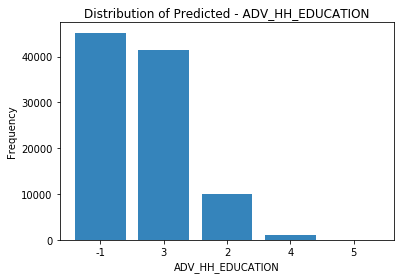

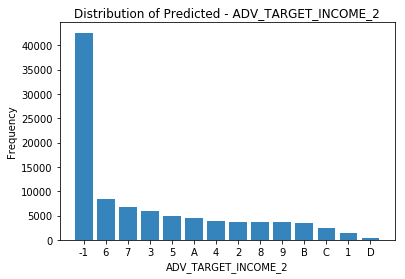

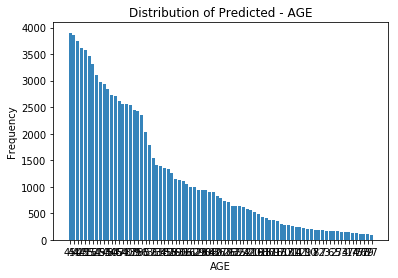

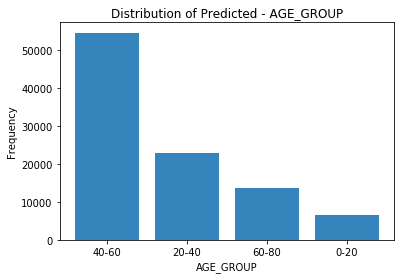

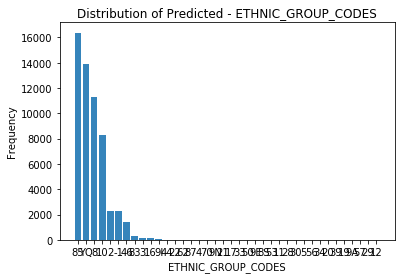

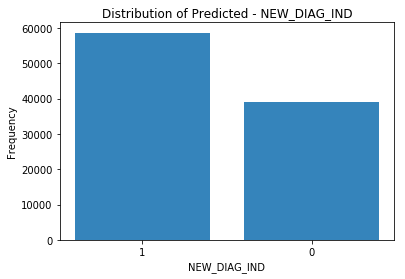

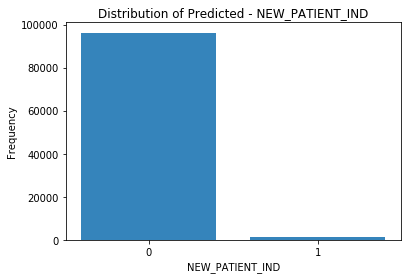

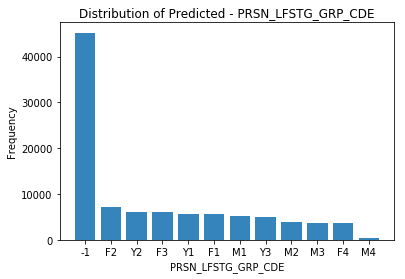

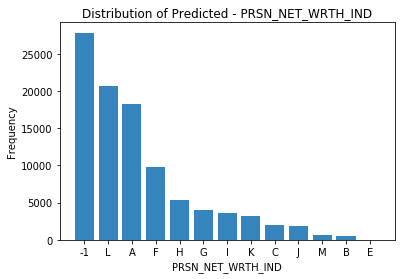

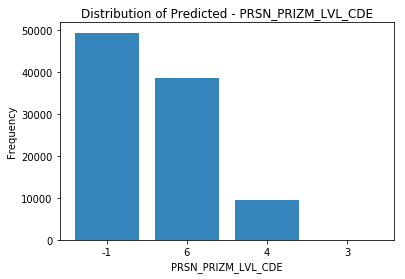

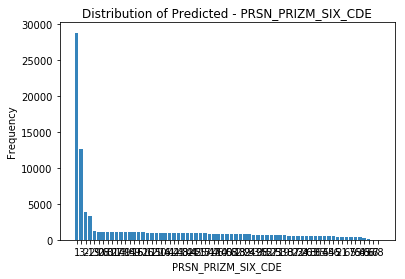

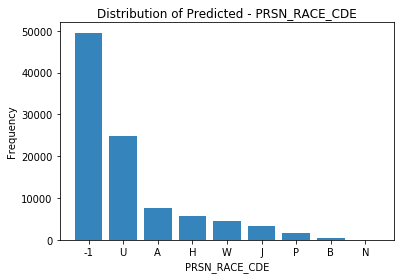

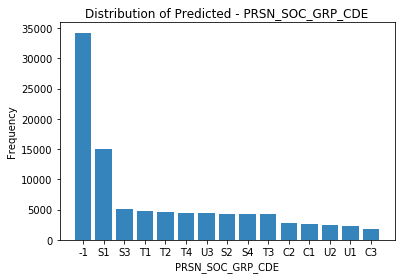

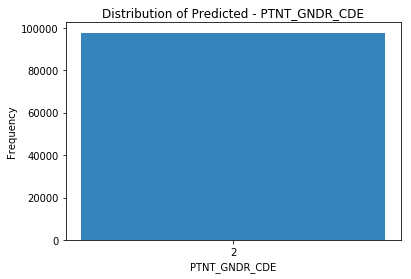

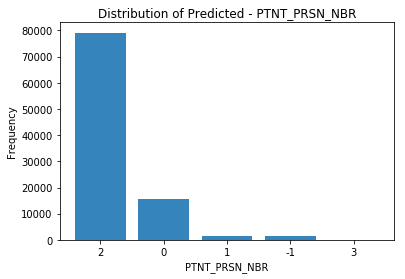

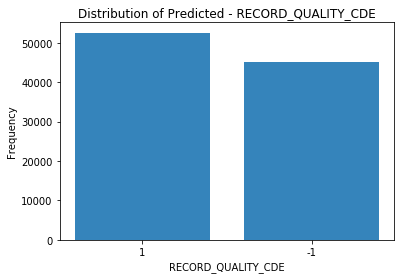

In [0]:
#col_count = dict(decoded_diseaseriosis['PRSN_LFSTG_GRP_CDE'].value_counts())
#cols = list(decoded_diseaseriosis.dtypes.pipe(lambda x: x[x == 'category']).index)
cols = np.setdiff1d(list(decoded_diseaseriosis.columns), ['P_ID', 'PRSN_BRTH_YR', 'PRSN_ZIP_SEC'])
for col in cols:
    cat_dist_plot(data = decoded_diseaseriosis, column = col, df_type= 'Predicted - ')

### Now let's have a look at the original data and make comparison on few predicted columns

In [0]:
df_disease['AGE'] = 2018 - df_disease.PRSN_BRTH_YR.values

# Adding Age Group as new feature
df_disease.loc[:,'AGE_GROUP'] = np.where(df_disease.AGE.values < 20, '0-20',
           np.where((df_disease.AGE.values > 20) & ( df_disease.AGE.values < 40), '20-40',
           np.where((df_disease.AGE.values > 40) & (df_disease.AGE.values < 60), '40-60', '60-80')))

# Selecting final list of columns
raw_diseaseriosis = df_disease[decoded_diseaseriosis.columns]

In [0]:
raw_diseaseriosis.head()

,P_ID,PTNT_GNDR_CDE,PRSN_LFSTG_GRP_CDE,PRSN_NET_WRTH_IND,PRSN_PRIZM_LVL_CDE,PRSN_PRIZM_SIX_CDE,PRSN_RACE_CDE,PRSN_SOC_GRP_CDE,PTNT_PRSN_NBR,PRSN_BRTH_YR,PRSN_ZIP_SEC,NEW_PATIENT_IND,NEW_DIAG_IND,ADV_HH_EDUCATION,ADV_TARGET_INCOME_2,RECORD_QUALITY_CDE,ETHNIC_GROUP_CODES,AGE,AGE_GROUP
0,1,2,-1,-1,-1,-1,-1,-1,-1,1952.0,-1,0,1,4,4,1,1,66.0,60-80
1,2,2,-1,-1,-1,-1,-1,-1,-1,1964.0,-1,0,1,3,3,1,1,54.0,40-60
2,3,2,-1,-1,-1,-1,-1,-1,-1,1964.0,-1,0,0,2,7,1,15,54.0,40-60
3,4,2,-1,-1,-1,-1,-1,-1,-1,1988.0,-1,0,1,4,7,1,15,30.0,20-40
4,5,2,-1,-1,-1,-1,-1,-1,0,1955.0,996,0,1,3,C,1,66,63.0,60-80


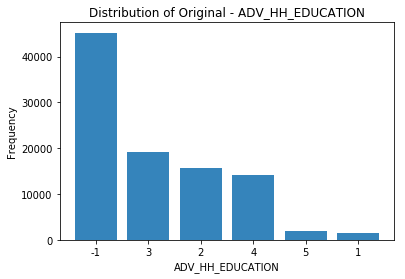

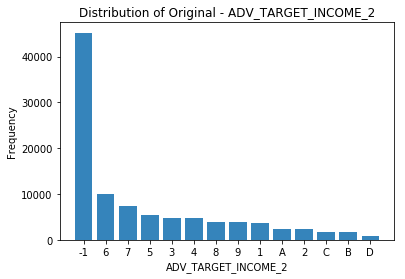

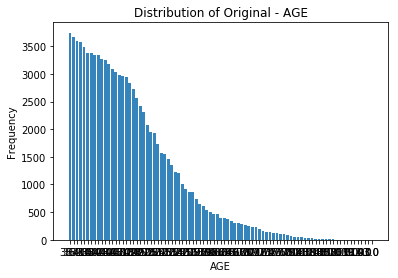

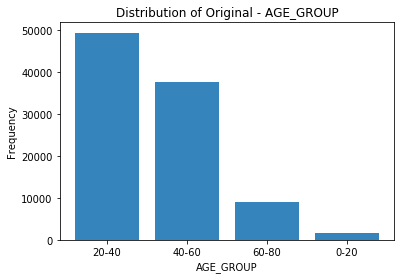

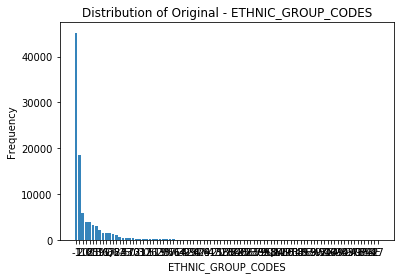

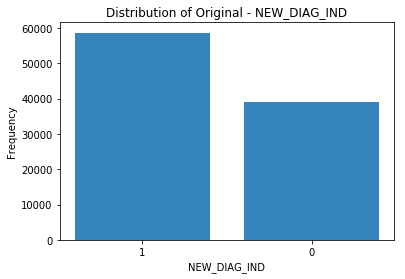

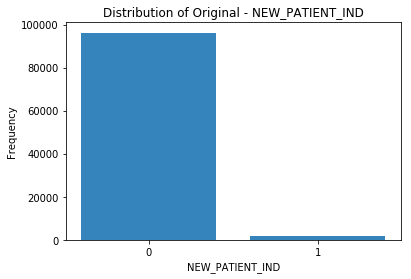

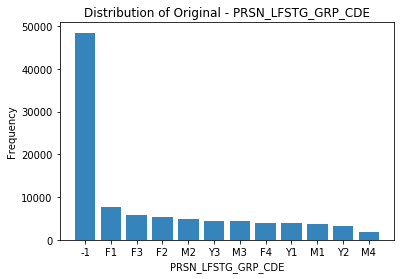

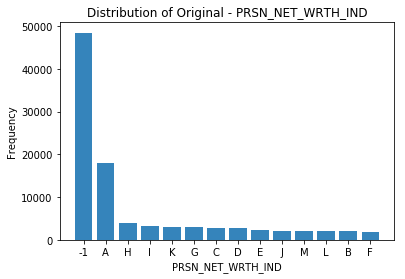

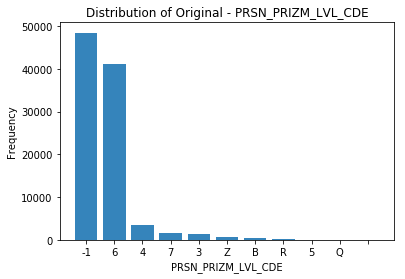

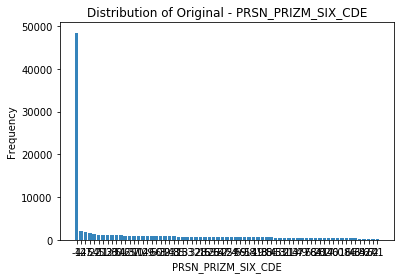

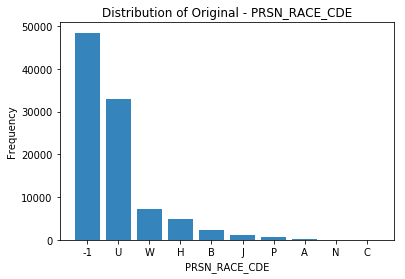

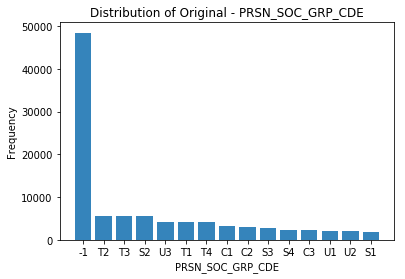

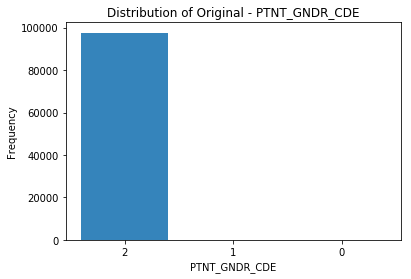

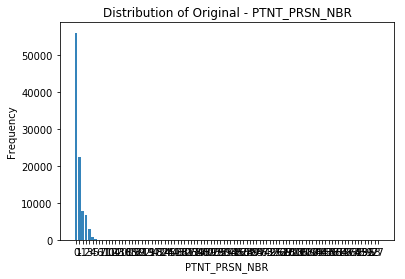

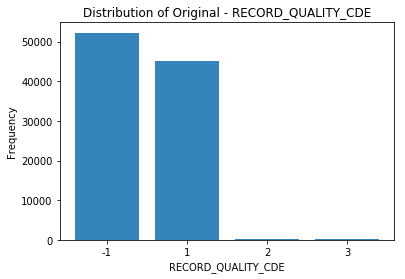

In [0]:
cols = np.setdiff1d(list(raw_diseaseriosis.columns), ['P_ID', 'PRSN_BRTH_YR', 'PRSN_ZIP_SEC'])
for col in cols:
    cat_dist_plot(data = raw_diseaseriosis, column = col, df_type = 'Original - ')

### Let's have a look at the Cross Tabulation between Orginal and Predicted Variables

In [0]:
# Setting pandas table display option
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [0]:
raw_diseaseriosis = raw_diseaseriosis.sort_values(by = 'P_ID').reset_index(drop = True)
decoded_diseaseriosis = decoded_diseaseriosis.sort_values(by = 'P_ID').reset_index(drop = True)

# Cross-tabulation between Raw and Predicted Diagnosis Indicator
pd.crosstab(raw_diseaseriosis['NEW_DIAG_IND'].values, decoded_diseaseriosis['NEW_DIAG_IND'].values)

col_0,0,1
row_0,,
0,39047,0
1,1,58676


In [0]:
# Cross-tabulation between Raw and Predicted New Patient Indicator
pd.crosstab(raw_diseaseriosis['NEW_PATIENT_IND']., decoded_diseaseriosis['NEW_PATIENT_IND'].values)

col_0,0,1
row_0,,
0,96148,0
1,30,1546


## Crosstabulation between Patient Indicator and Age

In [0]:
# Cross-tabulation between Raw and Predicted New Patient Indicator
print('Cross-tab between Patient Indicator and Age on predicted data')
pd.crosstab(decoded_diseaseriosis['NEW_PATIENT_IND'], decoded_diseaseriosis['AGE'])

Cross-tab between Patient Indicator and Age on predicted data


AGE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
NEW_PATIENT_IND,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2036,142,160,166,145,158,164,177,193,206,203,228,233,273,234,297,347,379,408,477,533,567,582,644,619,638,715,773,882,898,903,994,1155,1290,1289,1346,1532,2486,2388,2424,2522,3497,3685,3532,3817,3853,2688,2561,2760,2960,2733,3105,3297,2915,2550,3459,2350,1789,1241,1112,1131,992,990,896,903,638,1052,721,438,377,280,256,187,153,137,131,116,94,103,103,770
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,54,46,29,114,187,129,109,13,15,49,38,22,38,73,67,91,50,50,22,62,79,16,5,7,13,20,12,6,2,3,15,33,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,57


In [0]:
print('Cross-tab between Patient Indicator and Age on raw data')
pd.crosstab(raw_diseaseriosis['NEW_PATIENT_IND'], raw_diseaseriosis['AGE'].astype(int))

Cross-tab between Patient Indicator and Age on raw data


AGE,0,3,4,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,93,2019
NEW_PATIENT_IND,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,3,2,2,5,19,47,114,148,275,456,627,842,911,1170,1329,1523,1712,1881,2027,2367,2532,2794,2887,3019,3313,3292,3330,3613,3534,3682,3521,3301,3428,3221,3132,3187,2926,2971,2918,2685,2280,1918,1533,1447,1201,997,869,736,600,537,499,466,394,386,364,340,308,291,284,239,230,238,191,153,133,116,103,100,84,71,53,50,40,26,32,19,15,5,6,18,21,2,1,3
1,2,0,0,0,0,0,0,0,1,0,0,1,10,12,14,13,29,16,28,29,46,44,43,35,46,54,61,72,52,53,61,62,62,58,49,58,41,51,55,53,57,38,45,35,30,33,19,16,10,3,8,6,7,5,3,4,3,5,8,4,7,5,4,1,2,0,0,2,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Cross-tabulation between Patient Indicator and Age

In [0]:
print('Cross-tab between Patient Indicator and Age-Group on raw data')
pd.crosstab(raw_diseaseriosis['NEW_PATIENT_IND'], raw_diseaseriosis['AGE_GROUP'])

Cross-tab between Patient Indicator and Age-Group on raw data


AGE_GROUP,0-20,20-40,40-60,60-80
NEW_PATIENT_IND,,,,
0,1701,48437,37085,8925
1,26,864,570,116


In [0]:
print('Cross-tab between Patient Indicator and Age-Group on raw data')
pd.crosstab(decoded_diseaseriosis['NEW_PATIENT_IND'], decoded_diseaseriosis['AGE_GROUP'])

Cross-tab between Patient Indicator and Age-Group on raw data


AGE_GROUP,0-20,20-40,40-60,60-80
NEW_PATIENT_IND,,,,
0,6626,22125,53904,13523
1,1,821,626,98


## Cross-tabulation between New Diagnosis Indicator and Age Group

In [0]:
pd.crosstab(raw_diseaseriosis['NEW_DIAG_IND'], raw_diseaseriosis['AGE_GROUP'])

AGE_GROUP,0-20,20-40,40-60,60-80
NEW_DIAG_IND,,,,
0,644,23608,12451,2344
1,1083,25693,25204,6697


In [0]:
pd.crosstab(decoded_diseaseriosis['NEW_DIAG_IND'], decoded_diseaseriosis['AGE_GROUP'])

AGE_GROUP,0-20,20-40,40-60,60-80
NEW_DIAG_IND,,,,
0,3480,13996,18518,3054
1,3147,8950,36012,10567


## Cross-tabulation between raw and predicted calculated age

In [0]:
#decoded_diseaseriosis
pd.crosstab(decoded_diseaseriosis['AGE_GROUP'], decoded_diseaseriosis['AGE'])
#pd.crosstab(raw_diseaseriosis['AGE'], decoded_diseaseriosis['AGE'])

AGE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
AGE_GROUP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-20,2036,142,160,166,145,159,164,177,193,206,203,228,233,273,234,297,347,379,408,477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20-40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,567,582,644,619,638,715,789,936,944,932,1108,1342,1419,1398,1359,1547,2535,2426,2446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40-60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3570,3752,3623,3867,3903,2710,2623,2839,2976,2738,3112,3310,2935,2562,3465,2352,1792,1256,1145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60-80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1133,992,990,896,903,638,1052,722,438,377,280,256,187,153,137,131,116,94,103,103,827


In [0]:
pd.crosstab(raw_diseaseriosis['AGE_GROUP'], raw_diseaseriosis['AGE'].astype(int))

AGE,0,3,4,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,93,2019
AGE_GROUP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-20,3,1,1,3,2,2,5,19,48,114,148,276,466,639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20-40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,924,1199,1345,1551,1741,1927,2071,2410,2567,2840,2941,3080,3385,3344,3383,3674,3596,3744,3579,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40-60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3486,3262,3183,3242,2979,3028,2956,2730,2315,1948,1566,1466,1217,1007,872,744,606,544,504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60-80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,469,398,389,369,348,312,298,289,243,231,240,191,153,135,117,104,101,85,71,53,51,40,26,32,19,15,5,6,18,21,2,1,3


## Cross tabulation between Education and Income

In [0]:
pd.crosstab(raw_diseaseriosis['ADV_HH_EDUCATION'], raw_diseaseriosis['ADV_TARGET_INCOME_2'])

ADV_TARGET_INCOME_2,-1,1,2,3,4,5,6,7,8,9,A,B,C,D
ADV_HH_EDUCATION,,,,,,,,,,,,,,
-1,45181,0,1,3,3,1,6,3,1,0,1,0,0,0
1,0,361,148,293,198,173,225,114,48,22,12,2,0,0
2,0,2139,1227,2089,1943,1793,3119,1719,825,393,286,116,62,19
3,0,1027,786,1807,1816,2088,3920,2930,1620,1425,891,470,336,55
4,0,98,125,594,666,1202,2353,2271,1298,1751,1058,972,1156,635
5,0,14,5,59,61,137,340,313,178,267,105,118,148,103


In [0]:
pd.crosstab(decoded_diseaseriosis['ADV_HH_EDUCATION'], decoded_diseaseriosis['ADV_TARGET_INCOME_2'])

ADV_TARGET_INCOME_2,-1,1,2,3,4,5,6,7,8,9,A,B,C,D
ADV_HH_EDUCATION,,,,,,,,,,,,,,
-1,42537,1,0,0,0,0,0,0,0,0,0,0,0,237
2,0,113,1818,1858,1435,627,937,503,1077,119,617,746,78,0
3,0,1371,1830,3987,2367,4277,7249,6132,2452,3292,3636,2592,2197,78
4,0,13,5,70,20,74,189,175,55,162,148,109,125,3
5,0,0,0,0,0,0,0,0,0,0,6,0,1,0


In [0]:
### Now let's write these two files in local disk
raw_diseaseriosis.to_csv("/tf/notebooks/diseaseriosis/raw_diseaseriosis.csv", index = False)
decoded_diseaseriosis.to_csv("/tf/notebooks/diseaseriosis/decoded_diseaseriosis.csv", index = False)

In [0]:
raw_diseaseriosis.shape

(97724, 19)

In [0]:
decoded_diseaseriosis.shape

(97724, 19)